In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os.path
from tqdm import trange
from starkhelium import *

from scipy.constants import h, hbar, c, alpha, m_e, e, epsilon_0, atomic_mass, pi

In [3]:
nmin = 78
nmax = 81
B_z = 1.5776

#fig, ax = plt.subplots(figsize=(10, 6))
data = np.zeros([25286, 69])
field = []
states = get_nlm_vals(nmin, nmax)

i=0
for F in np.arange(0.0, 0.526, 0.001):
    field_str = str( F ).replace('.', '-')
    filename = "StarkMapData_n_" + str(nmin) + "-" + str(nmax) + "_E_" + field_str + "_" + field_str + "_1_B_1-5776.npy"
    if os.path.isfile(filename): 
        field.append(F)
        data[:,i] = np.load(filename)
        i+=1
        
directory = os.path.join(".", "csv")
fileout_data = os.path.join(directory, "StarkMapData_n_" + str(nmin) + "-" + str(nmax) + ".csv" )
fileout_field = os.path.join(directory, "StarkMapField_n_" + str(nmin) + "-" + str(nmax) + ".csv" )
fileout_states = os.path.join(directory, "StarkMapStates_n_" + str(nmin) + "-" + str(nmax) + ".csv" )
np.savetxt(fileout_data, data, delimiter=',')
np.savetxt(fileout_field, field, delimiter=',')
np.savetxt(fileout_states, states, delimiter=',')

Plotting: 100%|██████████████████████████| 25286/25286 [08:11<00:00, 26.28it/s]


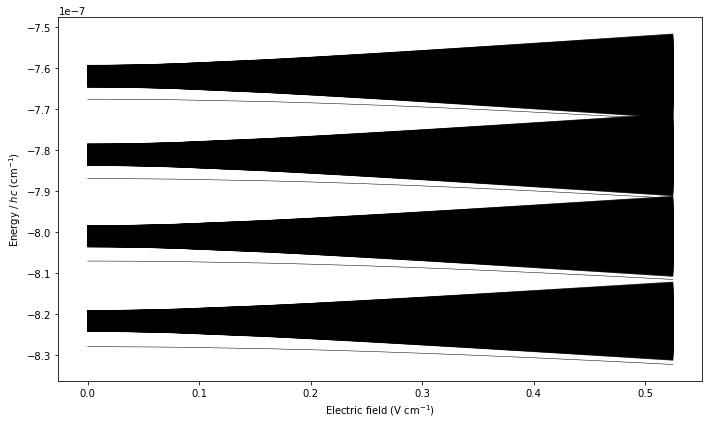

In [105]:
fig, ax = plt.subplots(figsize=(10, 6))

for i in trange(np.shape(data)[0], desc='Plotting'):
    ax.plot(field, 0.01*data[i] * En_h /(h * c), c='k', ls='-', marker='', lw=0.5)

# format
#ax.set_ylim(-36.25, -36.22)
#ax.set_xlim(0, 0.02)
ax.set_xlabel('Electric field (V cm$^{-1}$)')
ax.set_ylabel('Energy / $h c$ (cm$^{-1}$)')
plt.tight_layout()

# Create fileaname for Stark map
filename = "StarkMapPlot_n_" + str(nmin) + "-" + str(nmax) + \
"_E_" + str(np.min(field)).replace('.', '-') + "_" + str(np.max(field)).replace('.', '-') + "_" + str(len(field)) + \
"_B_" + str(B_z*1E3).replace('.', '-') + ".png"
# Get images directoy, create it if it doesn't exist
directory = os.path.join(".", "plots")
# Save Stark map to file
fileout = os.path.join(directory, filename)
plt.savefig(fileout)

plt.show()
plt.show()

In [119]:
alpha = 0.0072973525664
m_e = 9.10938356e-31
c = 299792458.0
h = 6.62607004e-34
En_h = alpha**2.0 * m_e * c**2.0
0.01 * En_h /(h * c)

219474.6314226566

In [120]:
h

6.62607004e-34